#### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
file = 'car+door.wav'

In [3]:
import IPython.display as ipd
ipd.Audio('car+door.wav')

#### Load track

In [4]:
y, sr = librosa.load(file)

print(len(y)) #data points
print(sr) #sampling rate

84420
22050


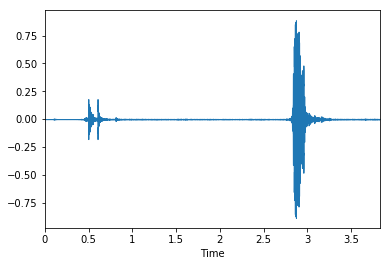

In [5]:
librosa.display.waveplot(y, sr=sr)

#### Trim leading and trailing silence from an audio signal.

In [6]:
x, index = librosa.effects.trim(y)
print(librosa.get_duration(y), librosa.get_duration(x))

3.8285714285714287 3.7589115646258504


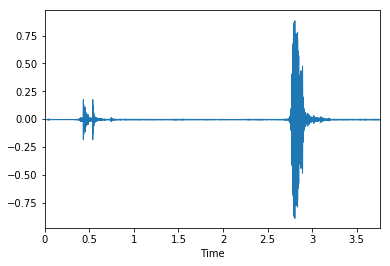

In [7]:
librosa.display.waveplot(x, sr=sr)

#### Spectrogram

In [8]:
hop_length = 192
n_fft = 1024

N -point FFT on each frame to calculate the frequency spectrum, which is also called Short-Time Fourier-Transform (STFT)

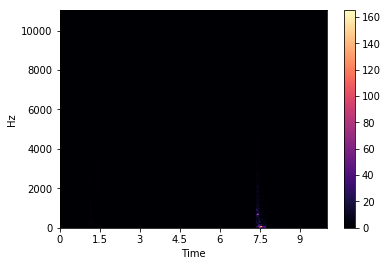

In [9]:
D = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))

librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar();

Most sounds humans hear are concentrated in very small frequency and amplitude ranges.

Adjustments : 
- transform both the y-axis (frequency) to log scale
- amplitude to Decibels (which is like the log scale of amplitudes)

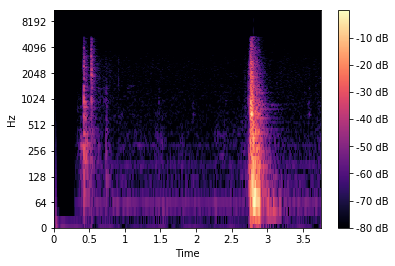

In [10]:
DB = librosa.amplitude_to_db(D, ref=np.max)

librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

- A spectrogram uses a linear spaced frequency scale (so each frequency bin is spaced an equal number of Hertz apart)
- an MFCC uses a quasi-logarithmic spaced frequency scale, which is more similar to how the human auditory system processes sounds.
- The Mel-scale aims to mimic the non-linear human ear perception of sound, by being more discriminative at lower frequencies and less discriminative at higher frequencies.
- In contrast to the Hz scale, where the difference between 500 and 1000 Hz is obvious, whereas the difference between 7500 and 8000 Hz is barely noticeable.

#### Mel Spectrogram : a Spectrogram with the Mel Scale as its y axis.

In [11]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

It partitions the Hz scale into bins, and transforms each bin into a corresponding bin in the Mel Scale, using a overlapping triangular filters.

Text(0.5, 1.0, 'Filter bank for converting from Hz to mels.')

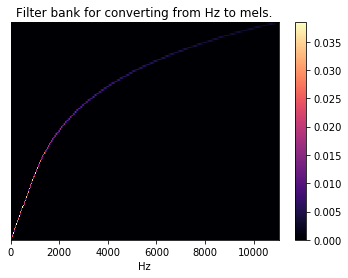

In [12]:
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear')
plt.colorbar()
plt.title('Filter bank for converting from Hz to mels.')

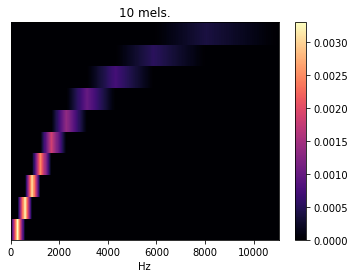

In [13]:
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear');
plt.colorbar();
plt.title('10 mels.');

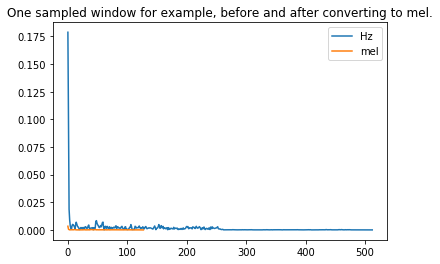

In [14]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

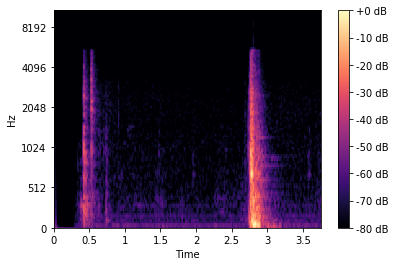

In [15]:
n_mels = 128

S = librosa.feature.melspectrogram(x, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

#### Links

- https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0
- https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html
- https://medium.com/@mikesmales/sound-classification-using-deep-learning-8bc2aa1990b7
- https://librosa.github.io/librosa/glossary.html
- https://librosa.github.io/librosa/generated/librosa.display.specshow.html
- https://librosa.github.io/librosa/generated/librosa.display.specshow.html

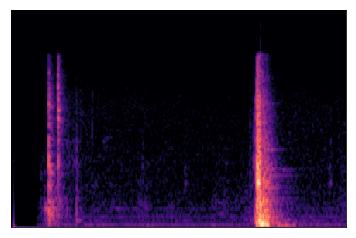

In [17]:
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length)

filename = file.split('.')[0] + '.png'
plt.savefig(filename)